In [1]:
import cv2 as cv
import math
import time
import matplotlib.pyplot as plt

In [2]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn,(x1, y1),(x2, y2),(0, 255, 0),int(round(frameHeight / 150)), 8)
            
    return frameOpencvDnn, bboxes

# Pre-Trained Models Used:-

1) [faceProto](https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/opencv_face_detector.pbtxt)

2) [faceModel](https://github.com/spmallick/learnopencv/blob/master/AgeGender/opencv_face_detector_uint8.pb)

3) [ageProto](https://github.com/spmallick/learnopencv/blob/master/AgeGender/age_deploy.prototxt)

4) [ageModel](https://github.com/GilLevi/AgeGenderDeepLearning/blob/master/models/age_net.caffemodel)

5) [genderProto](https://github.com/spmallick/learnopencv/blob/master/AgeGender/gender_deploy.prototxt)

6) [genderModel](https://github.com/eveningglow/age-and-gender-classification/blob/master/model/gender_net.caffemodel)

In [3]:
faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"

ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"

genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ["(0-2)","(4-6)","(8-12)","(15-20)",
           "(25-32)","(38-43)","(48-53)","(60-100)",]
genderList = ["Male", "Female"]

In [4]:
# Load Network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)
padding = 20

In [5]:
def gender_age_detector(frame):
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        print(bbox)
        face = frame[
            max(0, bbox[1] - padding) : min(bbox[3] + padding, frame.shape[0] - 1),
            max(0, bbox[0] - padding) : min(bbox[2] + padding, frame.shape[1] - 1),]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("\n->Gender detected as {}".format(gender))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("\n->Age between {}".format(age))

        label = "{} , {}".format(gender, age)
        cv.putText(frameFace,label,(bbox[0], bbox[1] - 10),cv.FONT_HERSHEY_SIMPLEX,0.8,(0, 255, 255),2,cv.LINE_AA,)
    return frameFace

In [6]:
def GA_generator(image):
    img = cv.imread(image)
    output = gender_age_detector(img)
    color = cv.cvtColor(output, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(color)
    plt.show()

[2418, 705, 3324, 1795]

->Gender detected as Male

->Age between (0-2)


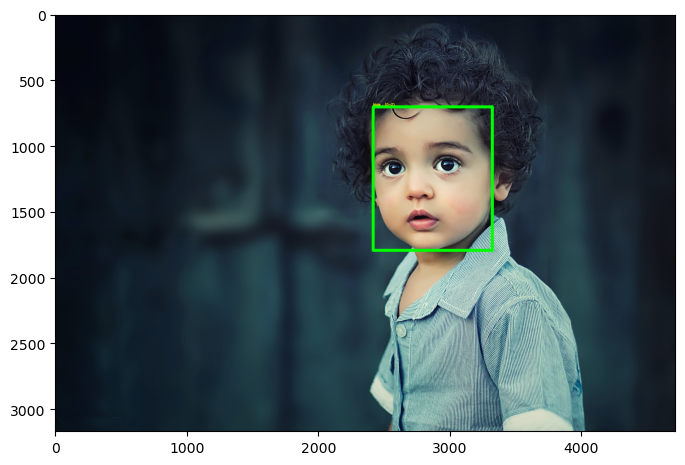

In [7]:
GA_generator("im7.jpg")

[2865, 846, 4378, 3020]

->Gender detected as Male

->Age between (25-32)


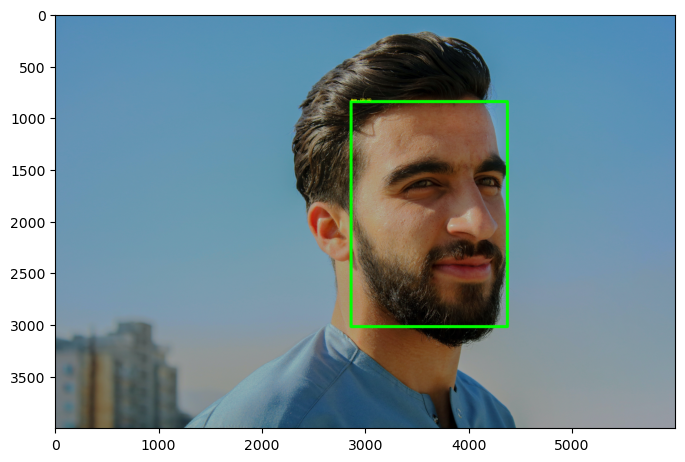

In [8]:
GA_generator("im3.jpg")

[2625, 494, 3523, 1627]

->Gender detected as Female

->Age between (25-32)


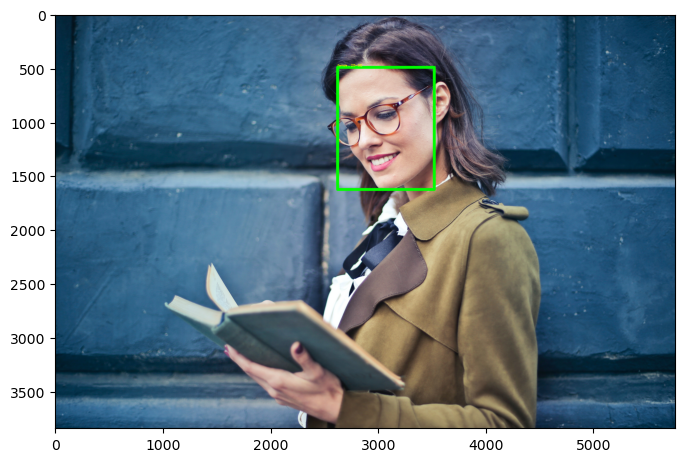

In [9]:
GA_generator("im1.jpg")

[1646, 650, 2733, 2198]

->Gender detected as Male

->Age between (38-43)


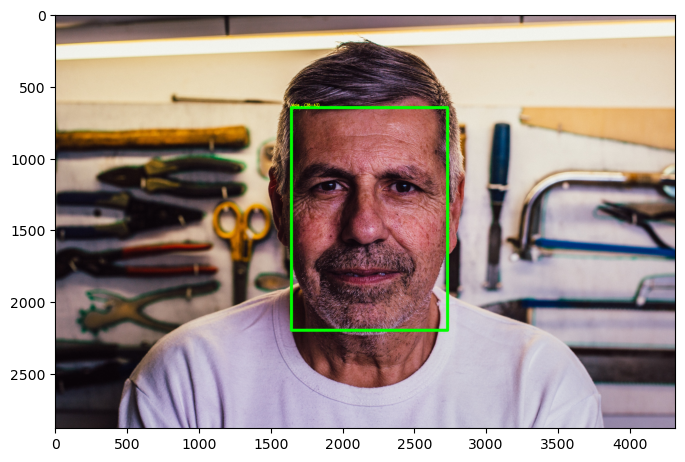

In [10]:
GA_generator("img4.jpg")

[Referred from...](https://nayanpatil-datascience.blogspot.com/p/practical-10.html)